# Air Quality Data Exploration
This notebook focuses on exploring air quality data stored in a PostgreSQL database. We will:
- Load the necessary libraries
- Connect to the PostgreSQL database
- Retrieve the air quality data into a pandas DataFrame
- Perform initial data exploration and processing

In [9]:
# Import necessary libraries
import warnings  # To handle warnings
import pandas as pd  # For data manipulation and analysis
import psycopg2  # To connect to the PostgreSQL database
from sklearn.model_selection import train_test_split  # For splitting data into train/test sets
from tqdm import tqdm  # For showing progress bars
import numpy as np  # For numerical operations

# Visualization libraries
import matplotlib.pyplot as plt  # For plotting graphs
import seaborn as sns  # For advanced visualizations
from sklearn.preprocessing import StandardScaler  # For standardizing data
from sklearn.preprocessing import MinMaxScaler  # For normalizing data

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')  # Ignore all warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)  # Ignore deprecation warnings

# Setting display options for pandas
pd.set_option('display.max_rows', 500)  # Show up to 500 rows in output
pd.set_option('display.max_columns', 500)  # Show up to 500 columns in output
pd.set_option('display.width', 1000)  # Set the display width for better readability


In [10]:
try:
    # Establishing the connection to the PostgreSQL database
    connection = psycopg2.connect(
        dbname='AirQualityDB',  # Name of the database
        user='root',  # Username for the database
        password='root',  # Password for the database
        host='localhost',  # Host where the database is running
        port='5432'  # Port number for the PostgreSQL server
    )

    # Using a cursor to execute a query
    with connection.cursor() as cursor:
        # Execute SQL query to fetch all records from the AirQuality table
        cursor.execute('SELECT * FROM "AirQuality"')
        
        # Fetch all rows from the executed query
        rows = cursor.fetchall()

        # Extract column names from the cursor description
        colnames = [desc[0] for desc in cursor.description]

        # Create a DataFrame from the fetched data
        df = pd.DataFrame(rows, columns=colnames)

        # Drop the 'index' column if it exists in the DataFrame
        if 'index' in df.columns:
            df.drop('index', axis=1, inplace=True)

except Exception as e:
    # Handle exceptions during database connection or data fetching
    print(f'An error occurred: {e}')

finally:
    # Ensure that the database connection is closed
    if connection:
        connection.close()


## Initial Data Exploration
Now that the data is loaded into a DataFrame, we will begin by exploring the structure and content of the data to understand its characteristics.

In [15]:
# tqdm.pandas()

## Initial Data Exploration
We will now explore the structure of the DataFrame to understand the data better. 

In [11]:
# df.shape

(9357, 15)

In [13]:
# # knowing the null values

df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

However we know that all the missing values are replace by $-200$. Then, we will replace this number by the missing values symbol `np.NaN`

In [14]:
# df.replace(-200, np.NaN, inplace=True)

In [16]:
# # knowing the null values

df.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

We now verify the data type for all the features:

In [17]:
# df.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

---

<center><h1>💻💻 Data Preparation 💻 💻</h1></center>

---

In [6]:
# df.sample(3)

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH
2495 2004-06-22  17:00:00     3.5       1177.0       NaN      20.5         1310.0    226.0         656.0    145.0        2011.0       1189.0  33.1  23.5  1.1673
6650 2004-12-12  20:00:00     3.1       1235.0       NaN      12.4         1065.0    409.0         640.0    133.0        1213.0       1594.0  11.3  50.1  0.6720
1963 2004-05-31  13:00:00     1.5       1060.0       NaN      14.2         1122.0    116.0         863.0    119.0        1721.0        836.0  30.9  24.4  1.0724

In [7]:
# df.dtypes

Date             datetime64[ns]
Time                     object
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
dtype: object

ORIGINAL_FEATURES = list(df_train.columns)

with open('data/ORIGINAL_FEATURES', 'wb') as fp0:
    pickle.dump(ORIGINAL_FEATURES, fp0)

In [8]:
# df.isnull().sum()

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

In [9]:
# df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour

In [134]:
# date_features_train = pd.DataFrame(
    {
        "day": df["Date"].dt.day,
        "year": df["Date"].dt.year,
        "quarter": df["Date"].dt.quarter,
        "month": df["Date"].dt.month,
        "weekday": df["Date"].dt.dayofweek,
        "week_year": df["Date"].dt.isocalendar().week,
    }
)

In [11]:
# date_features_train

day  year  quarter  month  weekday  week_year
0      10  2004        1      3        2         11
1      10  2004        1      3        2         11
2      10  2004        1      3        2         11
3      10  2004        1      3        2         11
4      10  2004        1      3        2         11
...   ...   ...      ...    ...      ...        ...
9352    4  2005        2      4        0         14
9353    4  2005        2      4        0         14
9354    4  2005        2      4        0         14
9355    4  2005        2      4        0         14
9356    4  2005        2      4        0         14

[9357 rows x 6 columns]

In [12]:
# df = pd.concat([df, date_features_train], axis=1)
df.shape

(9357, 21)

In [13]:
# df.dtypes

Date             datetime64[ns]
Time                      int32
CO(GT)                  float64
PT08.S1(CO)             float64
NMHC(GT)                float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
day                       int32
year                      int32
quarter                   int32
month                     int32
weekday                   int32
week_year                UInt32
dtype: object

In [14]:
# df

Date  Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  day  year  quarter  month  weekday  week_year
0    2004-03-10    18     2.6       1360.0     150.0      11.9         1046.0    166.0        1056.0    113.0        1692.0       1268.0  13.6  48.9  0.7578   10  2004        1      3        2         11
1    2004-03-10    19     2.0       1292.0     112.0       9.4          955.0    103.0        1174.0     92.0        1559.0        972.0  13.3  47.7  0.7255   10  2004        1      3        2         11
2    2004-03-10    20     2.2       1402.0      88.0       9.0          939.0    131.0        1140.0    114.0        1555.0       1074.0  11.9  54.0  0.7502   10  2004        1      3        2         11
3    2004-03-10    21     2.2       1376.0      80.0       9.2          948.0    172.0        1092.0    122.0        1584.0       1203.0  11.0  60.0  0.7867   10  2004        1      3        2         11
4    2004-03-10    22     1.6       1272.0      51.0       6.5          836.0    131.0        1205.0    116.0        1490.0       1110.0  11.2  59.6  0.7888   10  2004        1      3        2         11
...         ...   ...     ...          ...       ...       ...            ...      ...           ...      ...           ...          ...   ...   ...     ...  ...   ...      ...    ...      ...        ...
9352 2005-04-04    10     3.1       1314.0       NaN      13.5         1101.0    472.0         539.0    190.0        1374.0       1729.0  21.9  29.3  0.7568    4  2005        2      4        0         14
9353 2005-04-04    11     2.4       1163.0       NaN      11.4         1027.0    353.0         604.0    179.0        1264.0       1269.0  24.3  23.7  0.7119    4  2005        2      4        0         14
9354 2005-04-04    12     2.4       1142.0       NaN      12.4         1063.0    293.0         603.0    175.0        1241.0       1092.0  26.9  18.3  0.6406    4  2005        2      4        0         14
9355 2005-04-04    13     2.1       1003.0       NaN       9.5          961.0    235.0         702.0    156.0        1041.0        770.0  28.3  13.5  0.5139    4  2005        2      4        0         14
9356 2005-04-04    14     2.2       1071.0       NaN      11.9         1047.0    265.0         654.0    168.0        1129.0        816.0  28.5  13.1  0.5028    4  2005        2      4        0         14

[9357 rows x 21 columns]

## Preprocessing Data

### Categorical features

In [15]:
# CATEGORICAL_FEATURES = list(df.select_dtypes(include=['category','object', 'bool']).columns)

In [16]:
# CATEGORICAL_FEATURES

[]

In [17]:
# df.isnull().sum().sum()

16701

In [18]:
# ((df.isnull().sum()/len(df))*100).sort_values(ascending=False)

NMHC(GT)         90.231912
CO(GT)           17.986534
NO2(GT)          17.548360
NOx(GT)          17.516298
PT08.S4(NO2)      3.911510
PT08.S1(CO)       3.911510
C6H6(GT)          3.911510
PT08.S2(NMHC)     3.911510
PT08.S3(NOx)      3.911510
PT08.S5(O3)       3.911510
T                 3.911510
RH                3.911510
AH                3.911510
quarter           0.000000
weekday           0.000000
month             0.000000
Date              0.000000
year              0.000000
day               0.000000
Time              0.000000
week_year         0.000000
dtype: float64

In [19]:
# # saving missing values in a variable
missing_values = (df.isnull().sum())/len(df)*100

In [20]:
# # saving column names in a variable
columns_df = list(df.columns)

In [21]:
# # new variable to store variables having missing values less than a threshold
variables = [ ]
for number in range(len(columns_df)):
    if missing_values[number] <= 60: # setting the threshold as 60%
        variables.append(columns_df[number])

In [22]:
# variables

['Date',
 'Time',
 'CO(GT)',
 'PT08.S1(CO)',
 'C6H6(GT)',
 'PT08.S2(NMHC)',
 'NOx(GT)',
 'PT08.S3(NOx)',
 'NO2(GT)',
 'PT08.S4(NO2)',
 'PT08.S5(O3)',
 'T',
 'RH',
 'AH',
 'day',
 'year',
 'quarter',
 'month',
 'weekday',
 'week_year']

In [23]:
# df[variables] = df[variables].progress_apply(lambda x: x.fillna(x.median()))

100%|████████████████████████████████████████| 20/20 [00:00<00:00, 1309.86it/s]


In [24]:
# class MedianImputer:
    def __init__(self, variables=None):
        self.variables = variables
        self.median_dict = {}

    def fit(self, df):
        for col in self.variables:
            # Calculate and store the median for each variable
            self.median_dict[col] = df[col].median()
        return self

    def transform(self, df):
        df = df.copy()
        for col in self.variables:
            # Fill missing values with the stored median for each variable
            df[col].fillna(self.median_dict[col], inplace=True)
        return df

## Univariate Analysis: Numerical Variables

In [25]:
# # Listing the Numerical and Categorical datatypes
NUMERICAL_FEATURES = list(df[variables].select_dtypes(include=['int32','int64','float64','Int64']).columns)

In [26]:
# df[NUMERICAL_FEATURES] = df[NUMERICAL_FEATURES].astype(float)

In [27]:
# df[variables].dtypes

Date             datetime64[ns]
Time                    float64
CO(GT)                  float64
PT08.S1(CO)             float64
C6H6(GT)                float64
PT08.S2(NMHC)           float64
NOx(GT)                 float64
PT08.S3(NOx)            float64
NO2(GT)                 float64
PT08.S4(NO2)            float64
PT08.S5(O3)             float64
T                       float64
RH                      float64
AH                      float64
day                     float64
year                    float64
quarter                 float64
month                   float64
weekday                 float64
week_year                UInt32
dtype: object

In [28]:
# df[variables].isnull().sum().sum()

0

with open('data/NUMERICAL_FEATURES', 'wb') as fp6:
    pickle.dump(NUMERICAL_FEATURES, fp6)

In [29]:
# # custom function for easy and efficient analysis of numerical univariate


def UVA_numeric(data, var_group):
    """
    Univariate_Analysis_numeric
    takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

    Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
    """

    size = len(var_group)
    plt.figure(figsize=(7 * size, 3), dpi=100)

    # looping for each variable
    for j, i in enumerate(var_group):

        # calculating descriptives of variable
        mini = data[i].min()
        maxi = data[i].max()
        ran = data[i].max() - data[i].min()
        mean = data[i].mean()
        median = data[i].median()
        st_dev = data[i].std()
        skew = data[i].skew()
        kurt = data[i].kurtosis()

        # calculating points of standard deviation
        points = mean - st_dev, mean + st_dev

        # Plotting the variable with every information
        plt.subplot(1, size, j + 1)
        sns.kdeplot(x=data[i], shade=True)
        sns.lineplot(x=points, y=[0, 0], color="black", label="std_dev")
        sns.scatterplot(x=[mini, maxi], y=[0, 0], color="orange", label="min/max")
        sns.scatterplot(x=[mean], y=[0], color="red", label="mean")
        sns.scatterplot(x=[median], y=[0], color="blue", label="median")
        plt.xlabel("{}".format(i), fontsize=20)
        plt.ylabel("density")
        plt.title(
            "within 1 std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}".format(
                (round(points[0], 2), round(points[1], 2)),
                round(kurt, 2),
                round(skew, 2),
                (round(mini, 2), round(maxi, 2), round(ran, 2)),
                round(mean, 2),
                round(median, 2),
            )
        )


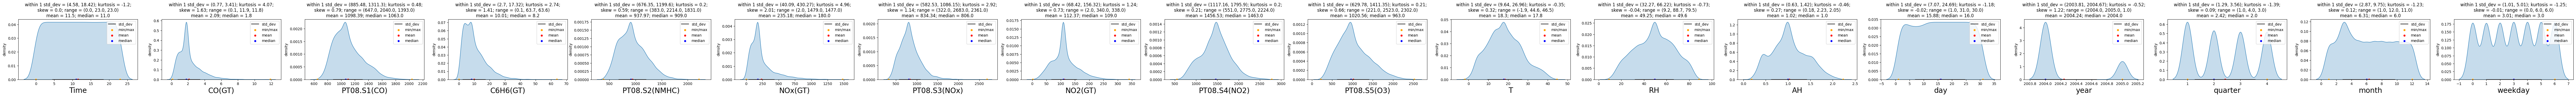

In [30]:
# UVA_numeric(df,NUMERICAL_FEATURES)

### Univariate Analysis: Outliers

In [31]:
# # custom function for easy outlier analysis


def UVA_outlier(data, var_group, include_outlier=True):
    """
    Univariate_Analysis_outlier:
    takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
    Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

    data : dataframe from which to plot from\n
    var_group : {list} type Group of Continuous variables\n
    include_outlier : {bool} whether to include outliers or not, default = True\n
    """

    size = len(var_group)
    plt.figure(figsize=(7 * size, 4), dpi=100)

    # looping for each variable
    for j, i in enumerate(var_group):

        # calculating descriptives of variable
        quant25 = data[i].quantile(0.25)
        quant75 = data[i].quantile(0.75)
        IQR = quant75 - quant25
        med = data[i].median()
        whis_low = med - (1.5 * IQR)
        whis_high = med + (1.5 * IQR)

        # Calculating Number of Outliers
        outlier_high = len(data[i][data[i] > whis_high])
        outlier_low = len(data[i][data[i] < whis_low])

        if include_outlier == True:
            print(include_outlier)
            # Plotting the variable with every information
            plt.subplot(1, size, j + 1)
            sns.boxplot(data[i], orient="v")
            plt.ylabel("{}".format(i))
            plt.title(
                "With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n".format(
                    round(IQR, 2),
                    round(med, 2),
                    (round(quant25, 2), round(quant75, 2)),
                    (outlier_low, outlier_high),
                )
            )

        else:
            # replacing outliers with max/min whisker
            data2 = data[var_group][:]
            data2[i][data2[i] > whis_high] = whis_high + 1
            data2[i][data2[i] < whis_low] = whis_low - 1

            # plotting without outliers
            plt.subplot(1, size, j + 1)
            sns.boxplot(data2[i], orient="v")
            plt.ylabel("{}".format(i))
            plt.title(
                "Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n".format(
                    round(IQR, 2),
                    round(med, 2),
                    (round(quant25, 2), round(quant75, 2)),
                    (outlier_low, outlier_high),
                )
            )

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


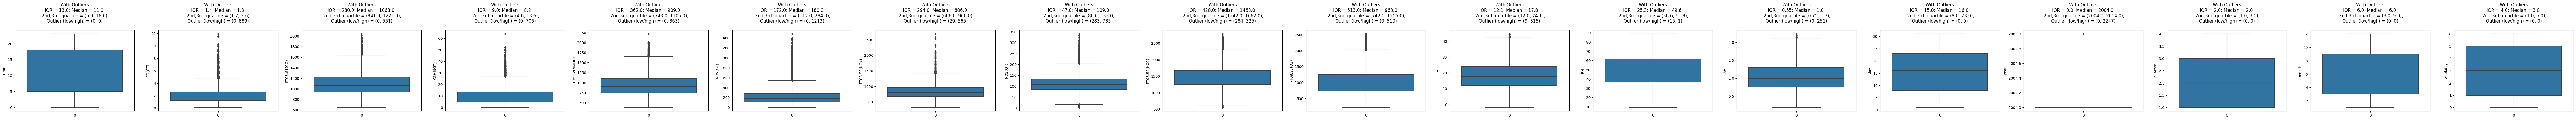

In [32]:
# UVA_outlier(df,NUMERICAL_FEATURES,)

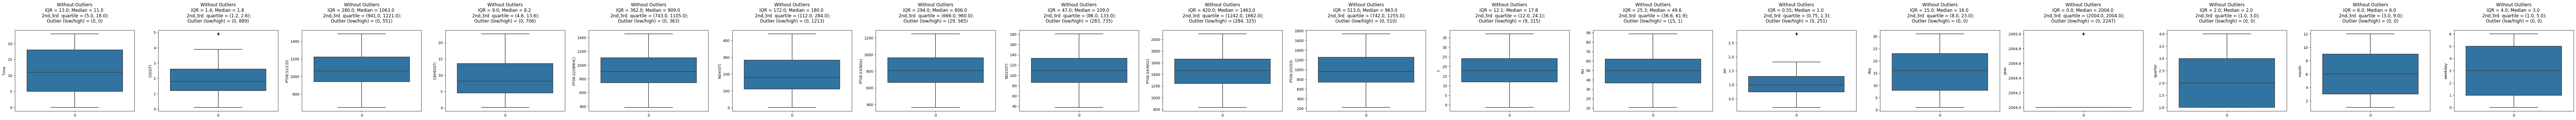

In [33]:
# UVA_outlier(df,NUMERICAL_FEATURES,False)

In [34]:
# from scipy.stats.mstats import winsorize

In [35]:
# for feature in NUMERICAL_FEATURES:
    df[feature+'_winsor'] = winsorize(df[feature], limits=[0.025, 0.025])

In [36]:
# df.describe().T

count                           mean                  min                  25%                  50%                  75%                  max         std
Date                    9357  2004-09-21 04:30:05.193972480  2004-03-10 00:00:00  2004-06-16 00:00:00  2004-09-21 00:00:00  2004-12-28 00:00:00  2005-04-04 00:00:00         NaN
Time                  9357.0                      11.498557                  0.0                  5.0                 11.0                 18.0                 23.0    6.923182
CO(GT)                9357.0                       2.089302                  0.1                  1.2                  1.8                  2.6                 11.9    1.323024
PT08.S1(CO)           9357.0                    1098.392433                647.0                941.0               1063.0               1221.0               2040.0  212.911465
NMHC(GT)               914.0                     218.811816                  7.0                 67.0                150.0                297.0               1189.0  204.459921
C6H6(GT)              9357.0                      10.009447                  0.1                  4.6                  8.2                 13.6                 63.7    7.311771
PT08.S2(NMHC)         9357.0                     937.973923                383.0                743.0                909.0               1105.0               2214.0  261.625561
NOx(GT)               9357.0                     235.178903                  2.0                112.0                180.0                284.0               1479.0  195.091025
PT08.S3(NOx)          9357.0                     834.339959                322.0                666.0                806.0                960.0               2683.0  251.808888
NO2(GT)               9357.0                     112.373303                  2.0                 86.0                109.0                133.0                340.0   43.948519
PT08.S4(NO2)          9357.0                    1456.528054                551.0               1242.0               1463.0               1662.0               2775.0  339.370072
PT08.S5(O3)           9357.0                    1020.562894                221.0                742.0                963.0               1255.0               2523.0   390.78496
T                     9357.0                      18.297574                 -1.9                 12.0                 17.8                 24.1                 44.6    8.658221
RH                    9357.0                      49.248509                  9.2                 36.6                 49.6                 61.9                 88.7   16.974949
AH                    9357.0                       1.024352               0.1847               0.7461               0.9954               1.2962                2.231    0.395878
day                   9357.0                      15.876884                  1.0                  8.0                 16.0                 23.0                 31.0    8.808653
year                  9357.0                    2004.240141               2004.0               2004.0               2004.0               2004.0               2005.0    0.427192
quarter               9357.0                       2.422571                  1.0                  1.0                  2.0                  3.0                  4.0    1.134365
month                 9357.0                       6.310356                  1.0                  3.0                  6.0                  9.0                 12.0     3.43816
weekday               9357.0                       3.009939                  0.0                  1.0                  3.0                  5.0                  6.0    2.000323
week_year             9357.0                      26.284065                  1.0                 13.0                 26.0                 40.0                 53.0   15.257919
Time_winsor           9357.0                      11.498557                  0.0                  5.0                 11.0       

In [37]:
# NUMERICAL_FEATURES_WINSOR = [feature+'_winsor' for feature in NUMERICAL_FEATURES]

# with open('data/NUMERICAL_FEATURES_WINSOR', 'wb') as fp7:
#    pickle.dump(NUMERICAL_FEATURES_WINSOR, fp7)

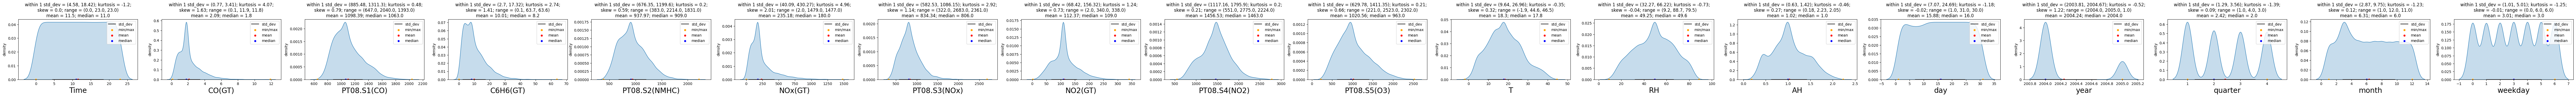

In [38]:
# UVA_numeric(df,NUMERICAL_FEATURES)

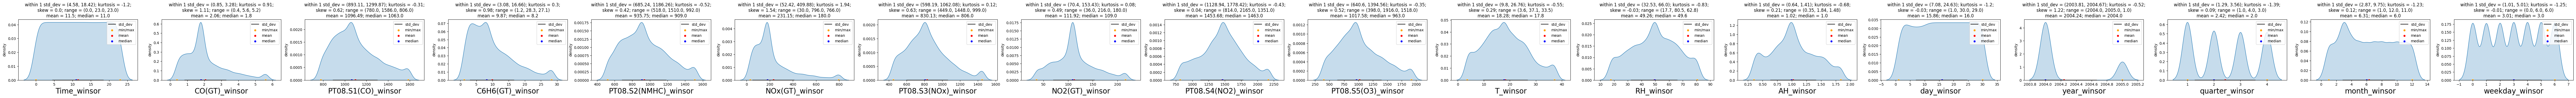

In [39]:
# UVA_numeric(df,NUMERICAL_FEATURES_WINSOR)

In [40]:
# df.shape

(9357, 39)

GEOLOCATION_0 = ['latitude', 'longitude']

GEOLOCATION = ['latitude_winsor', 'longitude_winsor']

with open('data/GEOLOCATION_0', 'wb') as fp9:
    pickle.dump(GEOLOCATION_0, fp9)
    
with open('data/GEOLOCATION', 'wb') as fp8:
    pickle.dump(GEOLOCATION, fp8)

We then consider the following dataset:

In [41]:
# NUMERICAL_FEATURES_WINSOR

['Time_winsor',
 'CO(GT)_winsor',
 'PT08.S1(CO)_winsor',
 'C6H6(GT)_winsor',
 'PT08.S2(NMHC)_winsor',
 'NOx(GT)_winsor',
 'PT08.S3(NOx)_winsor',
 'NO2(GT)_winsor',
 'PT08.S4(NO2)_winsor',
 'PT08.S5(O3)_winsor',
 'T_winsor',
 'RH_winsor',
 'AH_winsor',
 'day_winsor',
 'year_winsor',
 'quarter_winsor',
 'month_winsor',
 'weekday_winsor']

# Key-transformations

In [42]:
# df_winsor = df[NUMERICAL_FEATURES_WINSOR]

In [43]:
# df_winsor.sample()

Time_winsor  CO(GT)_winsor  PT08.S1(CO)_winsor  C6H6(GT)_winsor  PT08.S2(NMHC)_winsor  NOx(GT)_winsor  PT08.S3(NOx)_winsor  NO2(GT)_winsor  PT08.S4(NO2)_winsor  PT08.S5(O3)_winsor  T_winsor  RH_winsor  AH_winsor  day_winsor  year_winsor  quarter_winsor  month_winsor  weekday_winsor
5208         18.0            1.8               981.0             10.1                 983.0           180.0                759.0           109.0               1370.0               942.0      14.8       56.3     0.9459        13.0       2004.0             4.0          10.0             2.0

NUMERICAL_FEATURE2 = numerical

with open('data/NUMERICAL_FEATURE2', 'wb') as fp9:
    pickle.dump(NUMERICAL_FEATURE2, fp9)

In [47]:
# df_winsor.shape

(9357, 18)

In [55]:
# df_winsor = np.log(abs(df_winsor) + 1)

In [56]:
# std_train = StandardScaler()
scaled_train = std_train.fit_transform(df_winsor)
scaled_train = pd.DataFrame(scaled_train, columns=NUMERICAL_FEATURES_WINSOR)

In [57]:
# scaled_train.shape

(9357, 18)

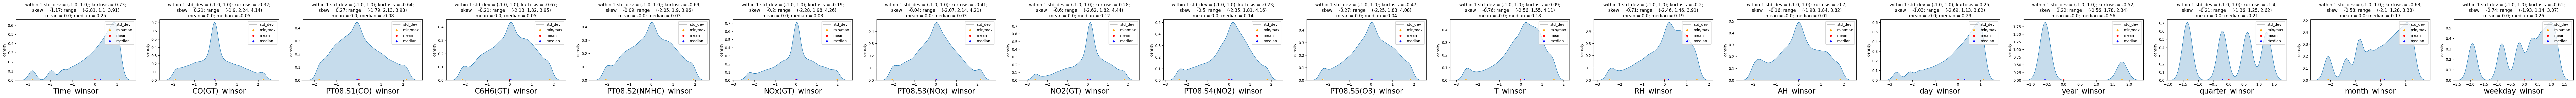

In [58]:
# UVA_numeric(scaled_train,NUMERICAL_FEATURES_WINSOR)

In [59]:
# min_max_train = MinMaxScaler()
scaled_min_max_train = min_max_train.fit_transform(df_winsor)
scaled_min_max_train = pd.DataFrame(scaled_min_max_train, columns=NUMERICAL_FEATURES_WINSOR)

In [60]:
# scaled_min_max_train.describe().T

count      mean       std  min       25%       50%       75%  max
Time_winsor           9357.0  0.718213  0.255849  0.0  0.563791  0.781896  0.926491  1.0
CO(GT)_winsor         9357.0  0.458918  0.241618  0.0  0.291491  0.447019  0.609095  1.0
PT08.S1(CO)_winsor    9357.0  0.456497  0.254699  0.0  0.264349  0.436113  0.631386  1.0
C6H6(GT)_winsor       9357.0  0.539372  0.253327  0.0  0.360858  0.552597  0.730965  1.0
PT08.S2(NMHC)_winsor  9357.0  0.518932  0.252587  0.0  0.337010  0.525481  0.708015  1.0
NOx(GT)_winsor        9357.0  0.535756  0.234920  0.0  0.398353  0.543450  0.683275  1.0
PT08.S3(NOx)_winsor   9357.0  0.491874  0.237637  0.0  0.336539  0.499474  0.648828  1.0
NO2(GT)_winsor        9357.0  0.589190  0.225316  0.0  0.483324  0.615927  0.727494  1.0
PT08.S4(NO2)_winsor   9357.0  0.565616  0.240293  0.0  0.431833  0.599253  0.729644  1.0
PT08.S5(O3)_winsor    9357.0  0.551890  0.244958  0.0  0.396122  0.562025  0.730606  1.0
T_winsor              9357.0  0.622976  0.243586  0.0  0.491398  0.665892  0.802594  1.0
RH_winsor             9357.0  0.627853  0.255708  0.0  0.474486  0.676205  0.824020  1.0
AH_winsor             9357.0  0.519159  0.261592  0.0  0.345446  0.525677  0.715295  1.0
day_winsor            9357.0  0.704554  0.261762  0.0  0.548765  0.780807  0.906622  1.0
year_winsor           9357.0  0.240141  0.427192  0.0  0.000000  0.000000  0.000000  1.0
quarter_winsor        9357.0  0.521879  0.382349  0.0  0.000000  0.442507  0.756471  1.0
month_winsor          9357.0  0.620101  0.295928  0.0  0.370310  0.669282  0.859833  1.0
weekday_winsor        9357.0  0.627278  0.325847  0.0  0.356207  0.712414  0.920782  1.0

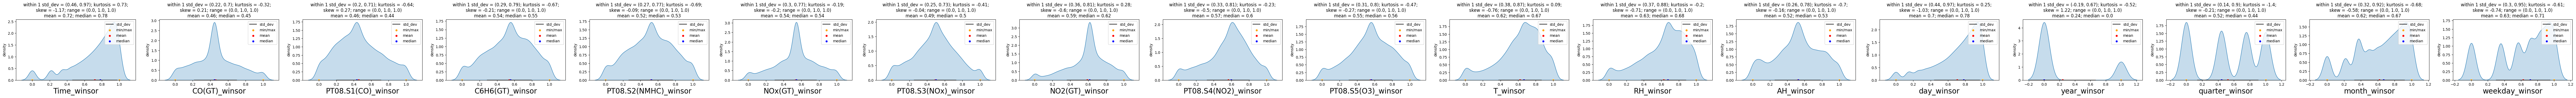

In [62]:
# UVA_numeric(scaled_min_max_train,NUMERICAL_FEATURES_WINSOR)

### High correlation filtering

In [64]:
# # creating the correlation matrix
corr_matrix = scaled_min_max_train[NUMERICAL_FEATURES_WINSOR].corr().abs()

In [65]:
# # Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

In [66]:
# s = corr_matrix.unstack()
so = s.sort_values(kind="quicksort",ascending = False)
so = pd.DataFrame(so, columns=['Pearson Correlation'])

In [67]:
# so[so['Pearson Correlation']<1].head(10)

Pearson Correlation
PT08.S2(NMHC)_winsor C6H6(GT)_winsor                  0.999390
C6H6(GT)_winsor      PT08.S2(NMHC)_winsor             0.999390
month_winsor         quarter_winsor                   0.945947
quarter_winsor       month_winsor                     0.945947
PT08.S2(NMHC)_winsor PT08.S1(CO)_winsor               0.886759
PT08.S1(CO)_winsor   PT08.S2(NMHC)_winsor             0.886759
C6H6(GT)_winsor      PT08.S1(CO)_winsor               0.882596
PT08.S1(CO)_winsor   C6H6(GT)_winsor                  0.882596
                     PT08.S5(O3)_winsor               0.882096
PT08.S5(O3)_winsor   PT08.S1(CO)_winsor               0.882096

For higher correlation filter conditions we have that the 'MedianStudentsPerTeacher' feature it will be not consider in the sequel:

In [117]:
# # fining index of variables with correlation greater than the threshold
TO_DROP = [column for column in upper.columns if any(upper[column] > 0.9)]

In [118]:
# len(TO_DROP)

2

In [119]:
# numerical_consider = [x for x in NUMERICAL_FEATURES_WINSOR if x not in TO_DROP]

In [120]:
# len(numerical_consider)

16

In [121]:
# numerical_consider

['Time_winsor',
 'CO(GT)_winsor',
 'PT08.S1(CO)_winsor',
 'C6H6(GT)_winsor',
 'NOx(GT)_winsor',
 'PT08.S3(NOx)_winsor',
 'NO2(GT)_winsor',
 'PT08.S4(NO2)_winsor',
 'PT08.S5(O3)_winsor',
 'T_winsor',
 'RH_winsor',
 'AH_winsor',
 'day_winsor',
 'year_winsor',
 'quarter_winsor',
 'weekday_winsor']

### Low variance filter

In [88]:
# from sklearn.preprocessing import normalize

In [89]:
# normalize = normalize(scaled_min_max_train[numerical_consider])

In [90]:
# data_scaled = pd.DataFrame(normalize)

In [91]:
# # storing the variance and name of variables
variance = data_scaled.var()
columns = scaled_min_max_train[numerical_consider].columns

In [92]:
# # Creating a DataFrame from the variances
variance_df = pd.DataFrame(variance, columns=['Variance'])
variance_df['Column'] = columns
variance_df = variance_df.reset_index(drop=True)

In [93]:
# variance_df.sort_values(by='Variance', ascending=False).head()

Variance               Column
13  0.032427          year_winsor
14  0.023370       quarter_winsor
15  0.018420       weekday_winsor
5   0.014461  PT08.S3(NOx)_winsor
12  0.012402           day_winsor

In [102]:
# # saving the names of variables having variance more than a threshold value
variable = []
for i in range(0,len(variance)):
    if variance[i] >= 0.001:  
        variable.append(columns[i])

In [103]:
# len(variable)

16

In [104]:
# scaled_min_max_train[variable].describe().T

count      mean       std  min       25%       50%       75%  max
Time_winsor          9357.0  0.718213  0.255849  0.0  0.563791  0.781896  0.926491  1.0
CO(GT)_winsor        9357.0  0.458918  0.241618  0.0  0.291491  0.447019  0.609095  1.0
PT08.S1(CO)_winsor   9357.0  0.456497  0.254699  0.0  0.264349  0.436113  0.631386  1.0
C6H6(GT)_winsor      9357.0  0.539372  0.253327  0.0  0.360858  0.552597  0.730965  1.0
NOx(GT)_winsor       9357.0  0.535756  0.234920  0.0  0.398353  0.543450  0.683275  1.0
PT08.S3(NOx)_winsor  9357.0  0.491874  0.237637  0.0  0.336539  0.499474  0.648828  1.0
NO2(GT)_winsor       9357.0  0.589190  0.225316  0.0  0.483324  0.615927  0.727494  1.0
PT08.S4(NO2)_winsor  9357.0  0.565616  0.240293  0.0  0.431833  0.599253  0.729644  1.0
PT08.S5(O3)_winsor   9357.0  0.551890  0.244958  0.0  0.396122  0.562025  0.730606  1.0
T_winsor             9357.0  0.622976  0.243586  0.0  0.491398  0.665892  0.802594  1.0
RH_winsor            9357.0  0.627853  0.255708  0.0  0.474486  0.676205  0.824020  1.0
AH_winsor            9357.0  0.519159  0.261592  0.0  0.345446  0.525677  0.715295  1.0
day_winsor           9357.0  0.704554  0.261762  0.0  0.548765  0.780807  0.906622  1.0
year_winsor          9357.0  0.240141  0.427192  0.0  0.000000  0.000000  0.000000  1.0
quarter_winsor       9357.0  0.521879  0.382349  0.0  0.000000  0.442507  0.756471  1.0
weekday_winsor       9357.0  0.627278  0.325847  0.0  0.356207  0.712414  0.920782  1.0

In [105]:
# scaled_min_max_train[['T_winsor','Time_winsor', 'RH_winsor']] = np.sqrt(scaled_min_max_train[['T_winsor','Time_winsor', 'RH_winsor']])

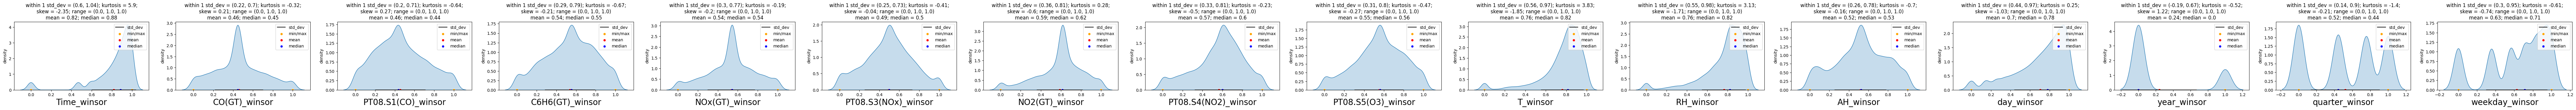

In [106]:
# UVA_numeric(scaled_min_max_train, variable)

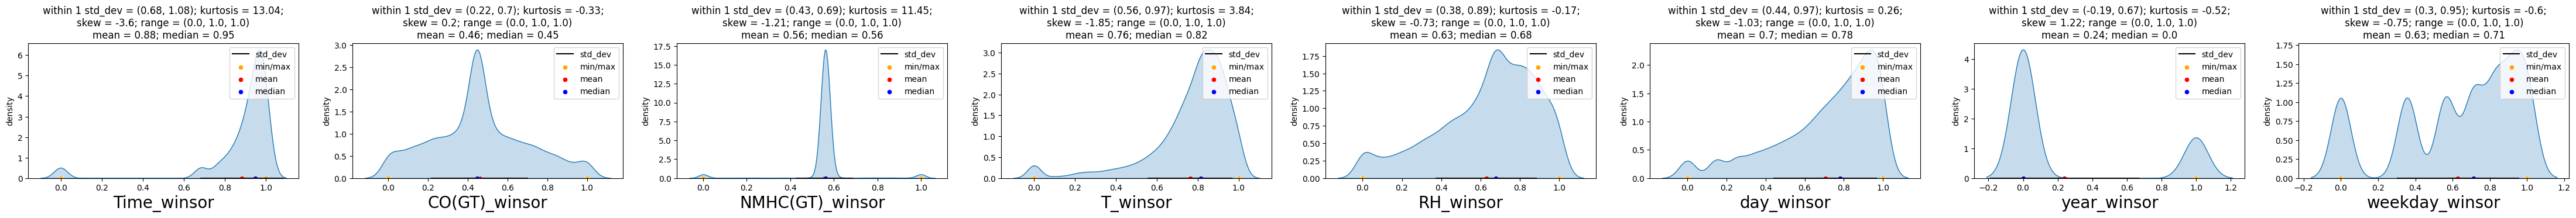

In [248]:
# UVA_numeric(scaled_min_max_train, variable)

In [241]:
# df_train[variable]

Time_winsor  CO(GT)_winsor  NMHC(GT)_winsor  T_winsor  RH_winsor  day_winsor  year_winsor  weekday_winsor
0            12.0            1.8            151.0      33.6       28.9        29.0       2004.0             6.0
1             5.0            0.5            151.0      15.8       53.8        22.0       2004.0             5.0
2            12.0            3.8            151.0      26.4       26.4        28.0       2004.0             1.0
3             8.0            1.0            151.0       6.2       51.3        26.0       2005.0             5.0
4            22.0            1.8            151.0      22.7       55.8         6.0       2004.0             2.0
...           ...            ...              ...       ...        ...         ...          ...             ...
8416         16.0            1.8            151.0      26.6       45.5         4.0       2004.0             3.0
8417          1.0            1.8            151.0      14.6       57.6        13.0       2004.0             2.0
8418          8.0            3.6            151.0      22.6       61.4        21.0       2004.0             3.0
8419         14.0            4.0            284.0      19.2       35.7        15.0       2004.0             3.0
8420         16.0            3.8            151.0      13.3       56.2         7.0       2005.0             4.0

[8421 rows x 8 columns]

## Final Datasets

In [136]:
# scaled_min_max_train.sample()

Time_winsor  CO(GT)_winsor  PT08.S1(CO)_winsor  C6H6(GT)_winsor  PT08.S2(NMHC)_winsor  NOx(GT)_winsor  PT08.S3(NOx)_winsor  NO2(GT)_winsor  PT08.S4(NO2)_winsor  PT08.S5(O3)_winsor  T_winsor  RH_winsor  AH_winsor  day_winsor  year_winsor  quarter_winsor  month_winsor  weekday_winsor
3653          1.0       0.347606            0.468869         0.588645              0.561787        0.198207             0.346735        0.335659             0.791125             0.62311  0.928807   0.858935        1.0    0.587206          0.0        0.756471      0.803545             0.0

In [ ]:
# 

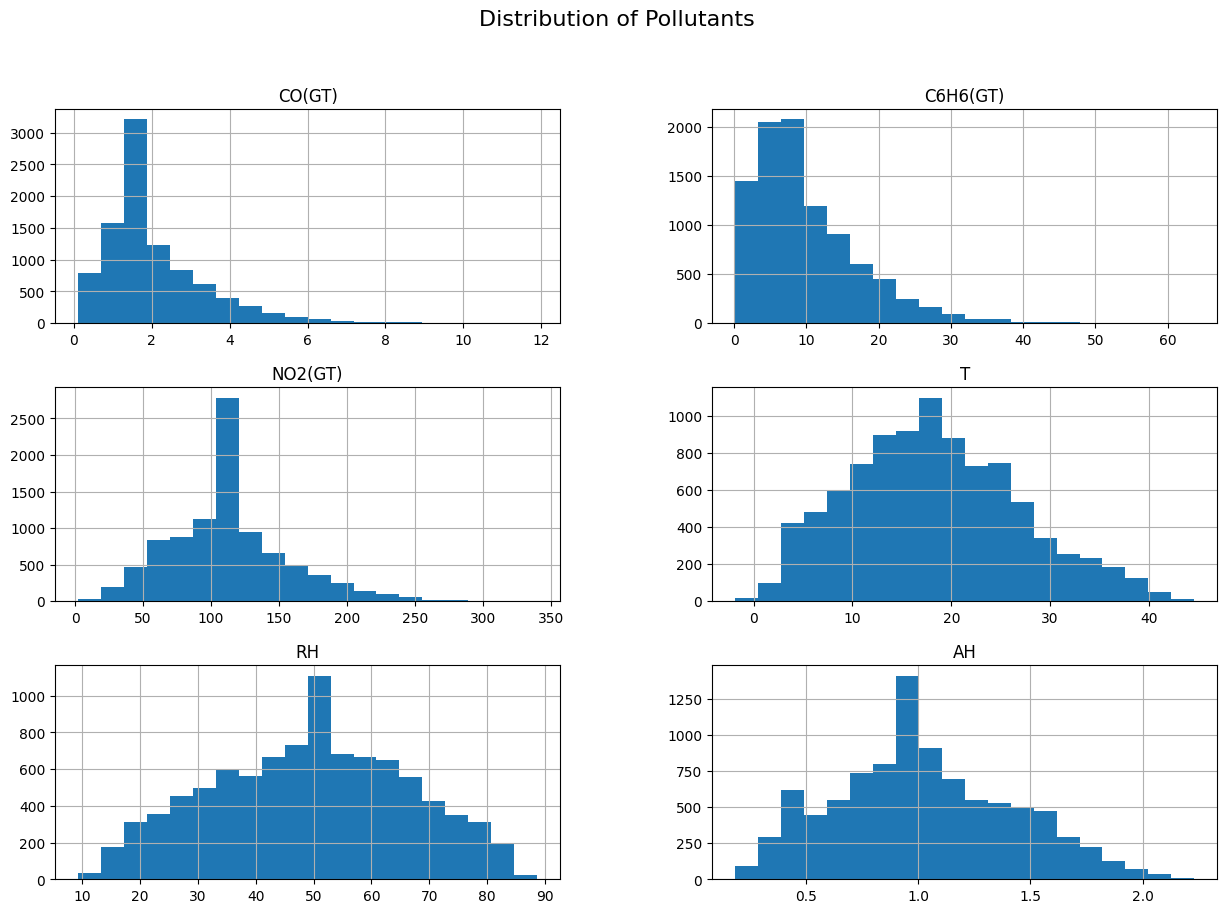

In [112]:
# pollutants = ["CO(GT)", "C6H6(GT)", "NO2(GT)", "T", "RH", "AH"]
df[pollutants].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Pollutants', fontsize=16)
plt.show()

In [132]:
# pollulant_winsor = ['CO(GT)_winsor', 'NO2(GT)_winsor', 'C6H6(GT)_winsor', "T_winsor", "RH_winsor", "AH_winsor"]

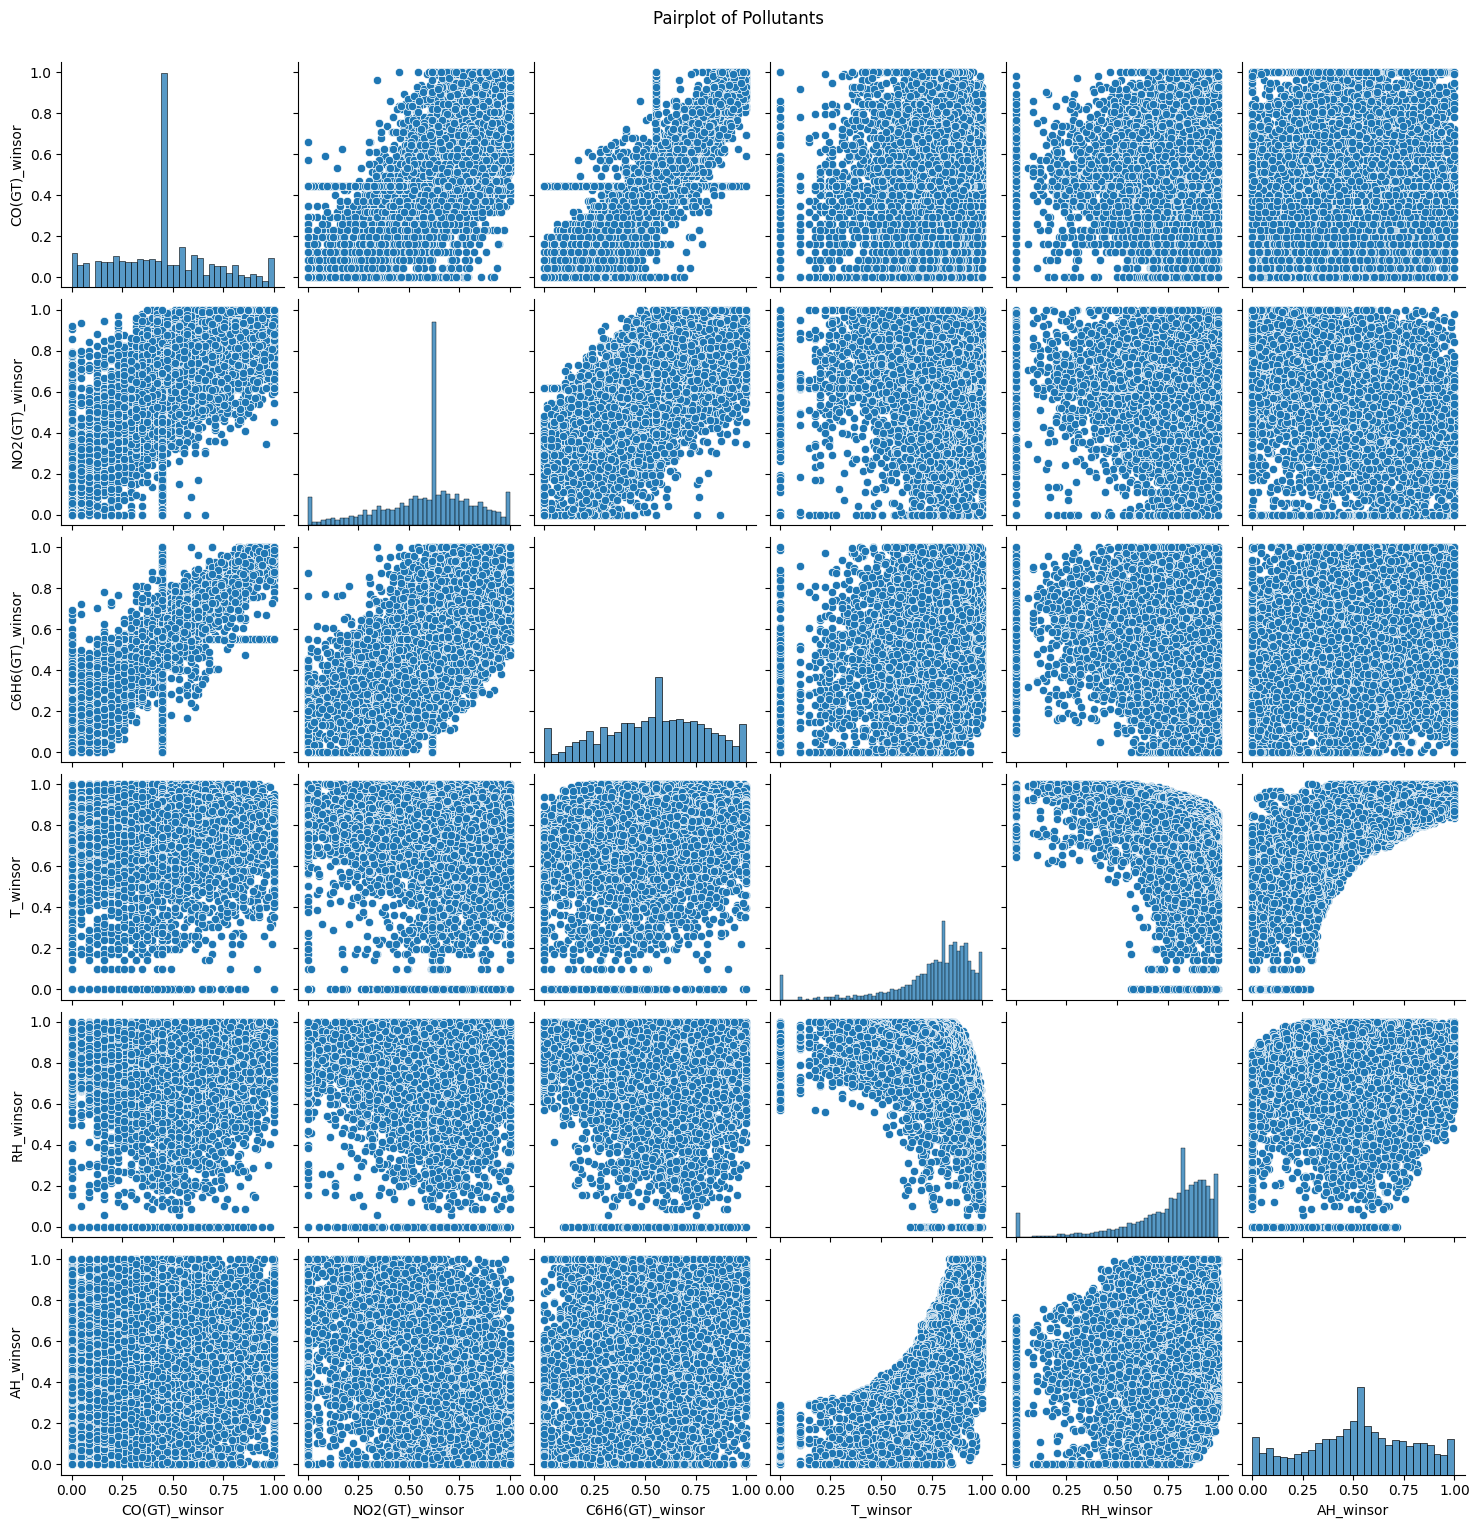

In [133]:
# sns.pairplot(scaled_min_max_train[pollulant_winsor])
plt.suptitle('Pairplot of Pollutants', y=1.02)
plt.show()

In [153]:
# final_train = pd.concat([feature_matrix_train[numerical+numerical_text+variable], df_train[['city','homeType','hasSpa','priceRange']]], axis=1)
final_test = pd.concat([feature_matrix_test[numerical+numerical_text+variable], df_test[['city','homeType','hasSpa','priceRange']]], axis=1)

In [154]:
# df_train.shape, final_train.shape, df_test.shape, final_test.shape

((9000, 52), (9000, 100), (1000, 52), (1000, 100))

#### Categorical to numerical features:

In [155]:
# datasets = [final_train, final_train]

for data in datasets:
    for column in ['city', 'homeType', 'hasSpa']:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])

In [156]:
# final_train['homeType'].value_counts(normalize=True)

homeType
1    0.943111
0    0.056889
Name: proportion, dtype: float64

In [157]:
# final_train['hasSpa'].value_counts(normalize=True)*100

hasSpa
0    91.633333
1     8.366667
Name: proportion, dtype: float64

In [158]:
# set(list(final_train.dtypes))

{CategoricalDtype(categories=['0-250000', '250000-350000', '350000-450000', '450000-650000', '650000+'], ordered=False),
 dtype('float64'),
 dtype('int64')}

In [159]:
# final_columns = list(final_train.columns)

In [160]:
# datasets = [final_train, final_train]

In [161]:
# import pickle

with open('data/datasets', 'wb') as fp:
    pickle.dump(final_columns, fp)

In [162]:
# with open ('data/datasets', 'rb') as fp:
    itemlist = pickle.load(fp)

In [164]:
# CONVERSION_DICT2 = {
    "city": float,
    "homeType": float,
    "hasSpa": float,
}

TO_CONVERT2 = list(CONVERSION_DICT2)

In [165]:
# with open('data/CONVERSION_DICT2', 'wb') as fp1:
    pickle.dump(CONVERSION_DICT2, fp1)

with open('data/TO_CONVERT2', 'wb') as fp2:
    pickle.dump(TO_CONVERT2, fp2)

In [168]:
# df_train[:1]

index    city                                        description       homeType   latitude  longitude  garageSpaces  hasSpa  yearBuilt  numOfPatioAndPorchFeatures  lotSizeSqFt  avgSchoolRating  MedianStudentsPerTeacher  numOfBathrooms  numOfBedrooms     priceRange  homeType_count  city_count  latitude_winsor  longitude_winsor  garageSpaces_winsor  yearBuilt_winsor  numOfPatioAndPorchFeatures_winsor  lotSizeSqFt_winsor  avgSchoolRating_winsor  MedianStudentsPerTeacher_winsor  numOfBathrooms_winsor  numOfBedrooms_winsor  homeType_count_winsor  city_count_winsor  latitude_round3  longitude_round3  appliance  area  back  backyard     build  ceiling  contain  family  feature      from  great   include     large   living  lot  new      open  single    update  walk
0      0  austin  Great single story on large tree covered corne...  Single Family  30.440748 -97.756256             0   False       1975                           1      10454.0              6.0                        13             2.0              3  250000-350000            8488        8910        30.440748        -97.756256                    0              1975                                  1             10454.0                     6.0                               13                    2.0                     3                   8488               8910           30.441           -97.756        0.0   0.0   0.0       0.0  0.406657      0.0      0.0     0.0      0.0  0.399231    0.0  0.333042  0.340036  0.38059  0.0  0.0  0.368504     0.0  0.409949   0.0

In [ ]:
# 

In [ ]:
# 